In [73]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using batch gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, batch_size=32, learning_rate=0.0001):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)

        for _ in range(1, epochs):
            print("theta: {}".format(self.theta_array))
            avg_batch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            self.theta_array -= learning_rate * avg_batch_partial_grads

    def validate(self, x, y):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_batch_loss(x, theta, y):
        avg_batch_loss = np.average(
                 np.sqrt(
                 np.square(
                 np.dot(x[index], theta) - y)))
        return avg_batch_loss
    
    def _check_theta_exists(self):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before predicting.")


In [74]:
linear_regression = LinearRegression()

In [75]:
x = np.array([np.arange(100), np.arange(100)])
delta = np.random.uniform(-10,10, size=(100,))
y = (.4 * x +3 + delta)[0]

In [76]:
linear_regression.train(x, y, epochs=10, learning_rate=0.0001)

theta: [0. 0. 0.]
theta: [0.15137137 0.15137137 0.00230852]
theta: [0.20332573 0.20332573 0.00311822]
theta: [0.22115766 0.22115766 0.0034135 ]
theta: [0.2272779  0.2272779  0.00353222]
theta: [0.22937839 0.22937839 0.00359033]
theta: [0.2300992  0.2300992  0.00362764]
theta: [0.23034647 0.23034647 0.00365781]
theta: [0.23043121 0.23043121 0.00368553]


In [77]:
y_predicted = linear_regression.predict(x)

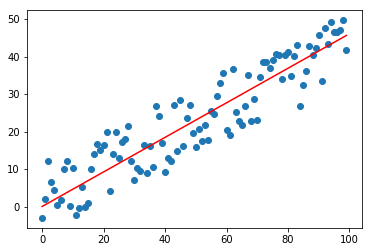

In [78]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x[0], y)
plt.plot(x[0], y_predicted, color='red')
plt.show()